# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/temps.csv')
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [5]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [6]:
df['week']

0        Fri
1        Sat
2        Sun
3        Mon
4       Tues
       ...  
343     Tues
344      Wed
345    Thurs
346      Fri
347      Sat
Name: week, Length: 348, dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['week_int'] = le.fit_transform(df['week'])
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,3
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,5
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,6
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,4
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,0


In [8]:
pd.get_dummies(df['week'])

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
343,0,0,0,0,0,1,0
344,0,0,0,0,0,0,1
345,0,0,0,0,1,0,0
346,1,0,0,0,0,0,0


In [9]:
my_week = {"Mon":1,
           "Tues":2,
           "Wed":3,
           "Thurs":4,
           "Fri":5,
           "Sat":6,
           "Sun":7}
df['week_int'] = df['week'].replace(my_week)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2


In [10]:
df['autumn'] = np.where(df['month'].isin([10,11,12]), 1, 0)
df['winter'] = np.where(df['month'].isin([1,2,3]), 1, 0)
df['spring'] = np.where(df['month'].isin([4,5,6]), 1, 0)
df['summer'] = np.where(df['month'].isin([7,8,9]), 1, 0)

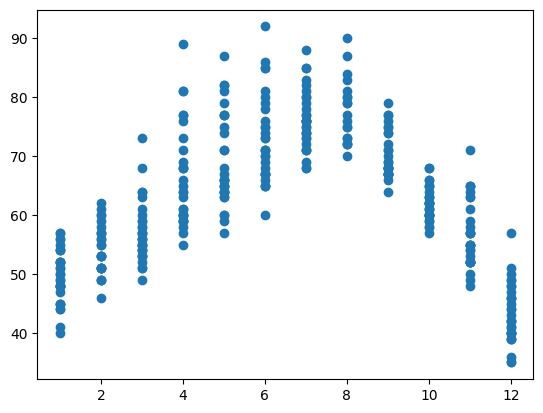

In [11]:
plt.scatter(df['month'], df['actual'])

In [13]:
df[['month','actual']].corr()

,month,actual
month,1.000000,0.004529
actual,0.004529,1.000000


In [14]:
my_month = {
    10:1,
    11:2,
    12:3,
    1:4,
    2:5,
    3:6,
    4:7,
    5:8,
    6:9,
    7:10,
    8:11,
    9:12
}

df['self_month'] = df['month'].replace(my_month)

df[['self_month','actual']].corr()

,self_month,actual
self_month,1.0000,0.6811
actual,0.6811,1.0000


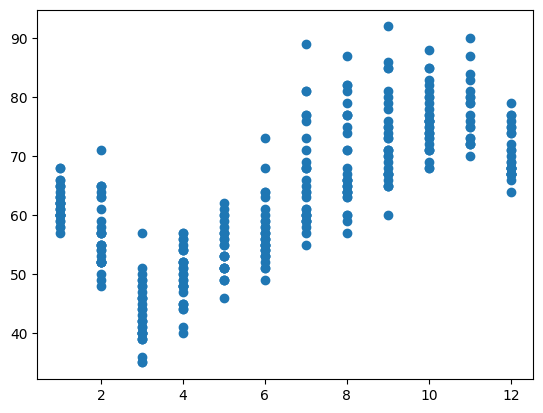

In [15]:
plt.scatter(df['self_month'], df['actual'])

<Axes: >

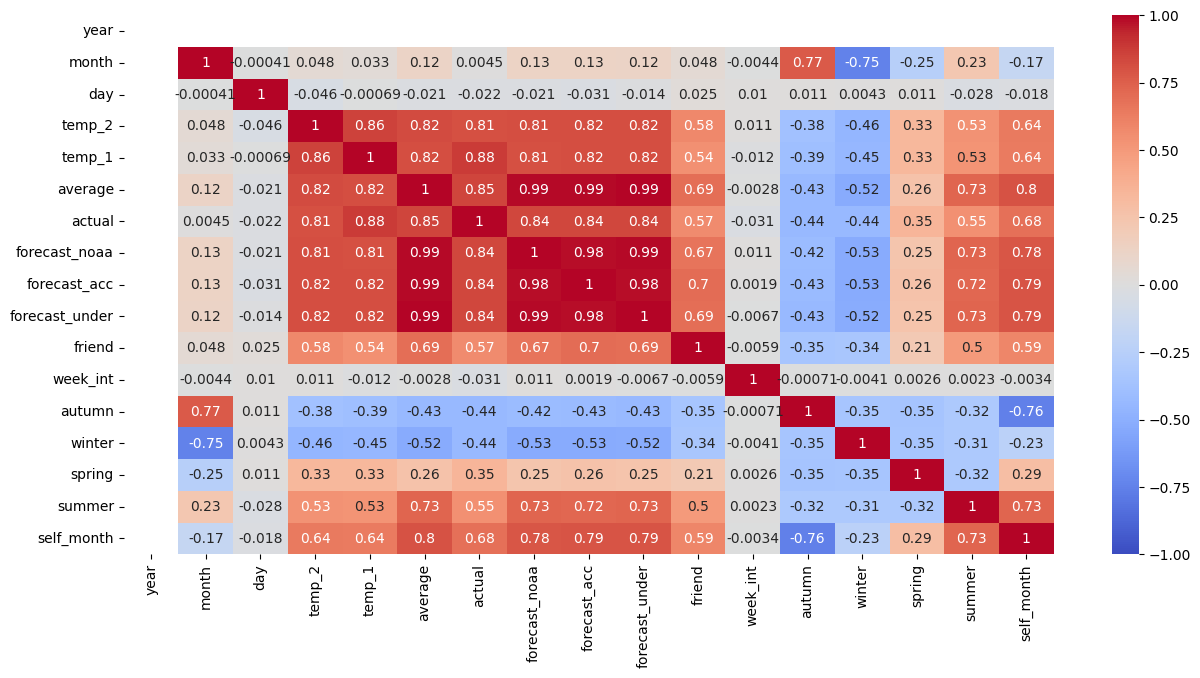

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, cmap="coolwarm")

### 3. Selecciona variables y divide en train y test

In [25]:
X = df[['temp_2', 'temp_1', 'average', 'self_month']]
y = df['actual']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 4)
(70, 4)
(278,)
(70,)


### 4. Entrena el modelo


In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [30]:
dtr.score(X_train, y_train)

1.0

In [31]:
dtr.score(X_test, y_test)

0.6730614294221362

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [32]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_pred = dtr.predict(X_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", mean_squared_error(y_test, y_pred)**(1/2))

MAE test 5.057142857142857
MAPE test 0.08049237643888267
MSE test 45.714285714285715
RMSE test 6.761234037828133


In [34]:
y_pred = dtr.predict(X_train)

print("MAE train", mean_absolute_error(y_train, y_pred))
print("MAPE train", mean_absolute_percentage_error(y_train, y_pred))
print("MSE train", mean_squared_error(y_train, y_pred))
print("RMSE train", mean_squared_error(y_train, y_pred)**(1/2))

MAE train 0.0
MAPE train 0.0
MSE train 0.0
RMSE train 0.0


### 6. Representa el árbol de decisión

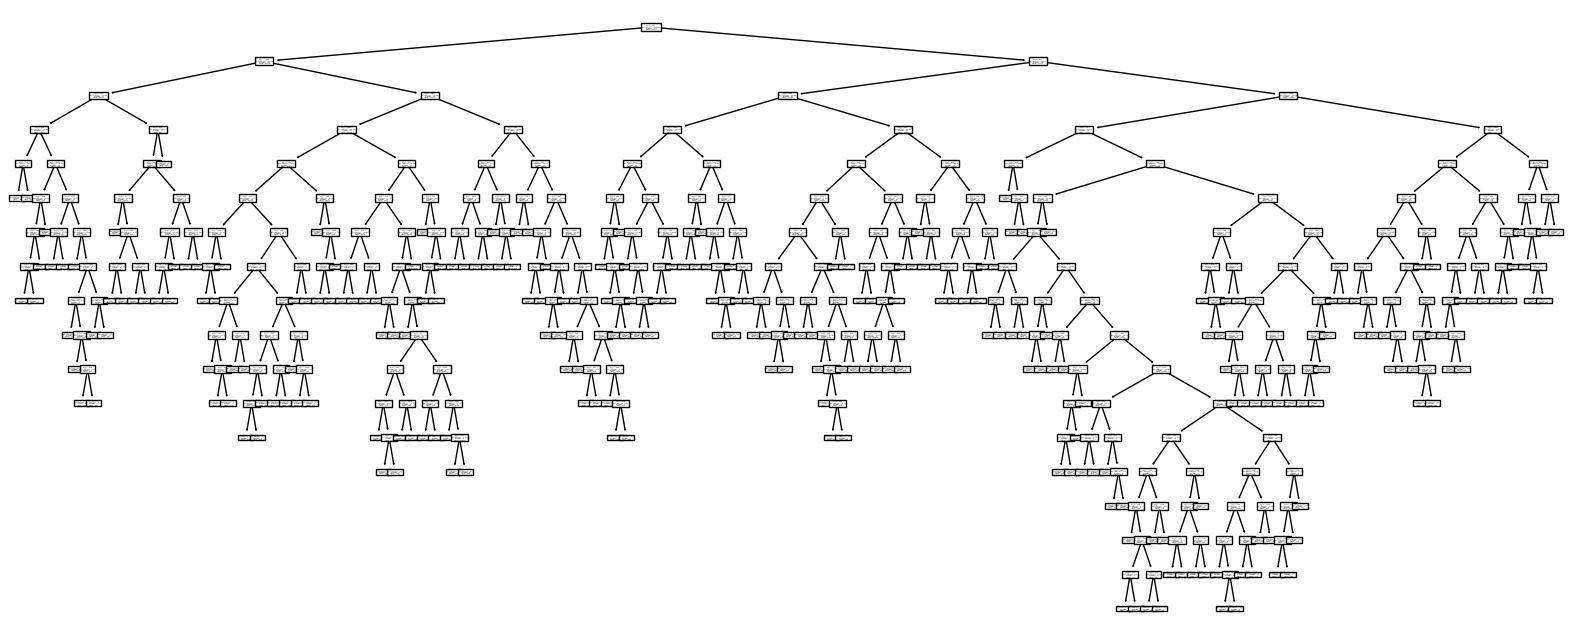

In [36]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,8))
plot_tree(dtr);

In [37]:
X.columns

Index(['temp_2', 'temp_1', 'average', 'self_month'], dtype='object')

In [38]:
dtr.feature_importances_

array([0.03913411, 0.78951966, 0.15204583, 0.01930041])

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [41]:
dtr_2 = DecisionTreeRegressor(max_depth=3)
dtr_2.fit(X_train, y_train)



R2 score test 0.7786776796296856
MAE test 4.267242249556827
MAPE test 0.0674392768128964
MSE test 30.946461197509944
RMSE test 5.5629543587476915


R2 score train 0.8397458755018086
MAE train 3.675752083754991
MAPE train 0.05874668452706153
MSE train 22.14996536445183
RMSE train 4.706374970659672


### 8. Vuelve a evaluar tu modelo

In [45]:
y_pred = dtr_2.predict(X_test)
print("R2 score test", dtr_2.score(X_test, y_test))
print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", mean_squared_error(y_test, y_pred)**(1/2))
print("-"*100)
y_pred = dtr_2.predict(X_train)
print("R2 score train", dtr_2.score(X_train, y_train))
print("MAE train", mean_absolute_error(y_train, y_pred))
print("MAPE train", mean_absolute_percentage_error(y_train, y_pred))
print("MSE train", mean_squared_error(y_train, y_pred))
print("RMSE train", mean_squared_error(y_train, y_pred)**(1/2))

R2 score test 0.7786776796296856
MAE test 4.267242249556827
MAPE test 0.0674392768128964
MSE test 30.946461197509944
RMSE test 5.5629543587476915
----------------------------------------------------------------------------------------------------
R2 score train 0.8397458755018086
MAE train 3.675752083754991
MAPE train 0.05874668452706153
MSE train 22.14996536445183
RMSE train 4.706374970659672


### 9. Vuelve a representar su árbol

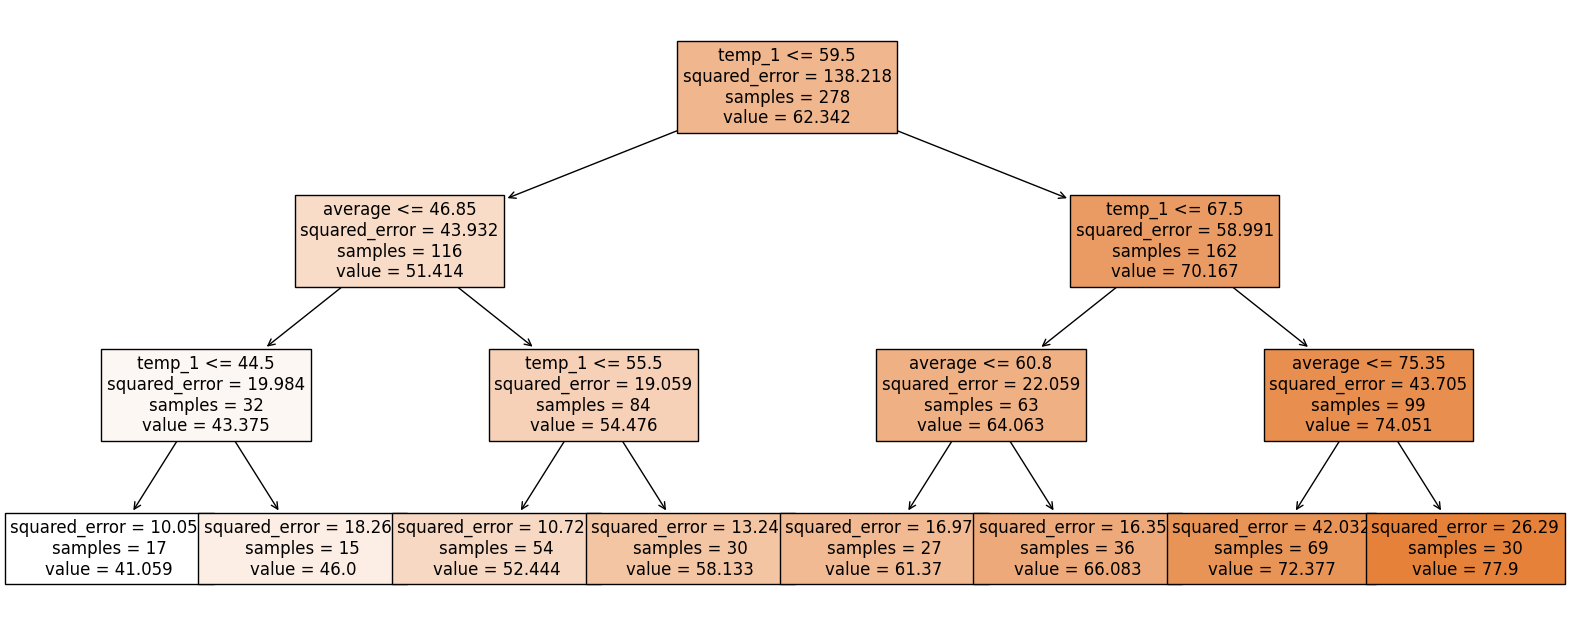

In [51]:
plt.figure(figsize=(20,8))
plot_tree(dtr_2, fontsize=12, feature_names=X_train.columns, filled=True);

In [52]:
dtr_2.feature_importances_

array([0.        , 0.88110924, 0.11889076, 0.        ])

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [53]:
from sklearn.model_selection import GridSearchCV

In [71]:
model = DecisionTreeRegressor()

parameters = {
    "max_depth": np.arange(2,8),
    "min_samples_leaf": [15,20,25],
    "criterion": ["squared_error", "absolute_error"]
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_absolute_error', verbose=2)

In [75]:
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=25; 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'min_samples_leaf': [15, 20, 25]},
             scoring='neg_mean_absolute_error', verbose=2)

In [76]:
print(dtr_gs.best_score_)
print(dtr_gs.best_params_)
print(dtr_gs.best_estimator_)

-4.029058441558442
{'criterion': 'absolute_error', 'max_depth': 4, 'min_samples_leaf': 20}
DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      min_samples_leaf=20)


In [77]:
final_model = DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      min_samples_leaf=15)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
print("R2 score test", final_model.score(X_test, y_test))
print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", mean_squared_error(y_test, y_pred)**(1/2))

R2 score test 0.8242705183143981
MAE test 3.9714285714285715
MAPE test 0.06279277823356964
MSE test 24.571428571428573
RMSE test 4.956957592256421


In [78]:
from sklearn.model_selection import cross_val_score

results_cv = cross_val_score(final_model, X, y, scoring="neg_mean_absolute_error", cv=5)
print(results_cv)
print(results_cv.mean())
print(results_cv.std())

[-3.28571429 -6.7        -4.39285714 -3.98550725 -4.74637681]
-4.622091097308489
1.1468951594951688


In [86]:
# Modelo baseline (overfitting)
y_pred = dtr.predict(X_test)
print("MAE test", mean_absolute_error(y_test, y_pred))
# Modelo 2 (regularizado)
y_pred = dtr_2.predict(X_test)
print("MAE test", mean_absolute_error(y_test, y_pred))
# Modelo 3 (hiperparametrizado)
y_pred = final_model.predict(X_test)
print("MAE test", mean_absolute_error(y_test, y_pred))

MAE test 5.057142857142857
MAE test 4.267242249556827
MAE test 3.9714285714285715


### 11. Obten el `feature_importances` de cada variable en el último modelo

In [79]:
final_model.feature_importances_

array([0.        , 0.83028571, 0.16971429, 0.        ])

<Axes: >

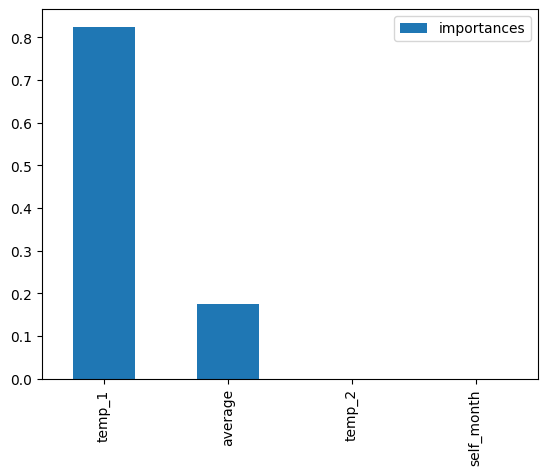

In [84]:
pd.DataFrame({'importances':final_model.feature_importances_}, index=X.columns).sort_values("importances",ascending=False).plot(kind='bar')

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [87]:
df['target_c'] = np.where(df['actual']>59, 1, 0)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,self_month,target_c
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0,4,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0,4,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0,4,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0,4,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0,4,0


In [89]:
df['target_c'].value_counts(normalize=True)

1    0.586207
0    0.413793
Name: target_c, dtype: float64

In [90]:
X = df[['temp_1', 'average']]
y = df['target_c']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 2)
(70, 2)
(278,)
(70,)


In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
model = DecisionTreeClassifier()

parameters = {
    "max_depth": np.arange(2,8),
    "min_samples_leaf": [5,10,15],
    "min_samples_split" : [10,20,30],
    "criterion": ["gini", "entropy"]
}

dtc_gs = GridSearchCV(model, parameters, cv=5, scoring="accuracy", verbose=2)
dtc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samp

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20, 30]},
             scoring='accuracy', verbose=2)

In [94]:
print(dtc_gs.best_score_)
print(dtc_gs.best_params_)
print(dtc_gs.best_estimator_)

0.8957142857142857
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 10}
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=10)


In [95]:
final_model_c = dtc_gs.best_estimator_
final_model_c.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=10)

In [96]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix

In [100]:
y_pred = final_model_c.predict(X_test)

print("Accuracy", final_model_c.score(X_test, y_test))
print("AUC", roc_auc_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("f1_score", f1_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

Accuracy 0.8714285714285714
AUC 0.8452380952380953
recall_score 0.9761904761904762
precision_score 0.8367346938775511
f1_score 0.9010989010989012
confusion_matrix
 [[20  8]
 [ 1 41]]


In [102]:
final_model_c.predict_proba(X_test)

array([[0.        , 1.        ],
       [0.24      , 0.76      ],
       [1.        , 0.        ],
       [0.24      , 0.76      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.24      , 0.76      ],
       [0.        , 1.        ],
       [0.43478261, 0.56521739],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.24      , 0.76      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.43478261, 0.56521739],
       [0.93333333, 0.06666667],
       [0.43478261, 0.56521739],
       [0.        , 1.        ],
       [0.24      , 0.76      ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.24      , 0.76      ],
       [0.43478261, 0.56521739],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.24      , 0.76      ],
       [0.        , 1.        ],
       [0.

In [107]:
model = DecisionTreeClassifier()

parameters = {
    "max_depth": np.arange(2,8),
    "min_samples_leaf": [5,10,15],
    "min_samples_split" : [10,20,30],
    "criterion": ["gini", "entropy"]
}

dtc_gs = GridSearchCV(model, parameters, cv=5, scoring="recall", verbose=2)
dtc_gs.fit(X_train, y_train)

print(dtc_gs.best_score_)
print(dtc_gs.best_params_)
print(dtc_gs.best_estimator_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samp

In [108]:
final_model_c = dtc_gs.best_estimator_
final_model_c.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=10)

In [109]:
y_pred = final_model_c.predict(X_test)

print("Accuracy", final_model_c.score(X_test, y_test))
print("AUC", roc_auc_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("f1_score", f1_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

Accuracy 0.9
AUC 0.8809523809523809
recall_score 0.9761904761904762
precision_score 0.8723404255319149
f1_score 0.9213483146067415
confusion_matrix
 [[22  6]
 [ 1 41]]


### 13. Construye un nuevo modelo `RandomForestClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
model = RandomForestClassifier()

parameters = {
    "n_estimators": [50,100],
    "max_depth": np.arange(2,5),
    "min_samples_leaf": [5,10,15],
    # "min_samples_split" : [10,20,30],
    # "criterion": ["gini", "entropy"]
}

rfc_gs = GridSearchCV(model, parameters, cv=3, scoring="recall", verbose=2)
rfc_gs.fit(X_train, y_train)

print(rfc_gs.best_score_)
print(rfc_gs.best_params_)
print(rfc_gs.best_estimator_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ...max_depth=2, min_samples_leaf=5, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=2, min_samples_leaf=5, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=2, min_samples_leaf=5, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=2, min_samples_leaf=5, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=2, min_samples_leaf=5, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=2, min_samples_leaf=5, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=2, min_samples_leaf=10, n_estimators=50; total time=   0.3s
[CV] END ..max_depth=2, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=2, min_samples_leaf=10, n_estimators=50; total time=   0.2s
[CV] END .max_depth=2, min_samples_leaf=10, n_estimators=100; total time=   0.4s
[CV] END .max_depth=2, min_samples_leaf=10, n_estimators=100; total time=   0.4s
[CV] END .max_depth=2, min_samples_leaf=10, n_es

In [114]:
final_model_c = rfc_gs.best_estimator_
final_model_c.fit(X_train, y_train)

y_pred = final_model_c.predict(X_test)

print("Accuracy", final_model_c.score(X_test, y_test))
print("AUC", roc_auc_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("f1_score", f1_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

Accuracy 0.9285714285714286
AUC 0.9166666666666667
recall_score 0.9761904761904762
precision_score 0.9111111111111111
f1_score 0.9425287356321839
confusion_matrix
 [[24  4]
 [ 1 41]]


In [115]:
final_model_c.feature_importances_

array([0.52677516, 0.47322484])